In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replacing Blanks with 0 as tenure is 0 and no Total Charges are recorded 

In [12]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
df.isnull().sum().sum()

np.int64(0)

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
df.duplicated().sum()

np.int64(0)

In [26]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
    
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

#converted 0 or 1 value of senior citizen to  yes/No to make it easier to understand

In [27]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


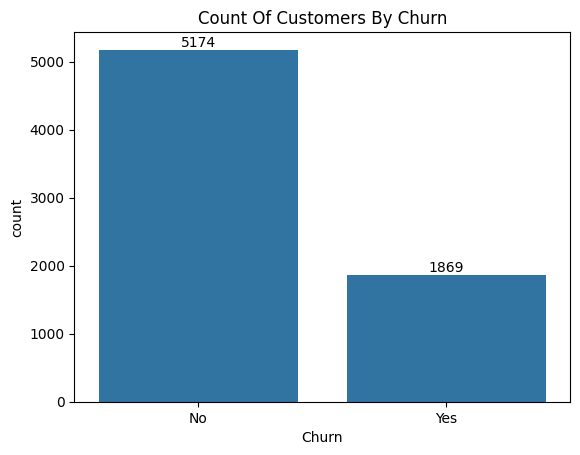

In [36]:
ax = sns.countplot(x = df["Churn"], data = df)
ax.set_title("Count Of Customers By Churn")
ax.bar_label(ax.containers[0])
plt.show()

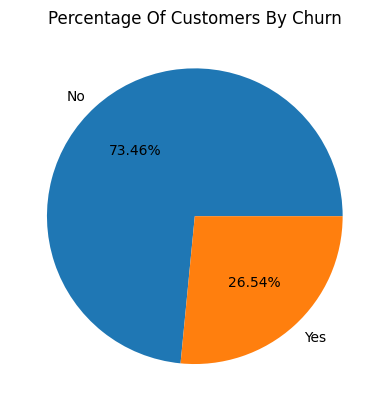

In [38]:
gb = df.groupby("Churn").agg({"Churn":"count"})
gb
plt.title("Percentage Of Customers By Churn")
plt.pie(gb["Churn"], labels = gb.index, autopct = "%1.2f%%")
plt.show()
        

#from the given pie chart we can calculate that 26.54% customers have Churned Out 
#Now let's find  out the reason behind it 

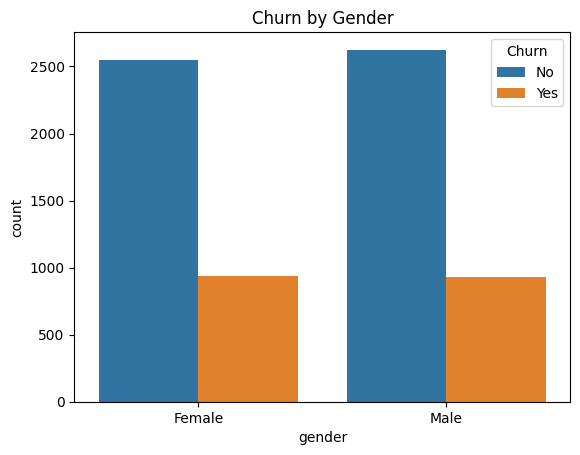

In [41]:
sns.countplot(x="gender" , data = df , hue = "Churn")
plt.title("Churn by Gender")
plt.show()

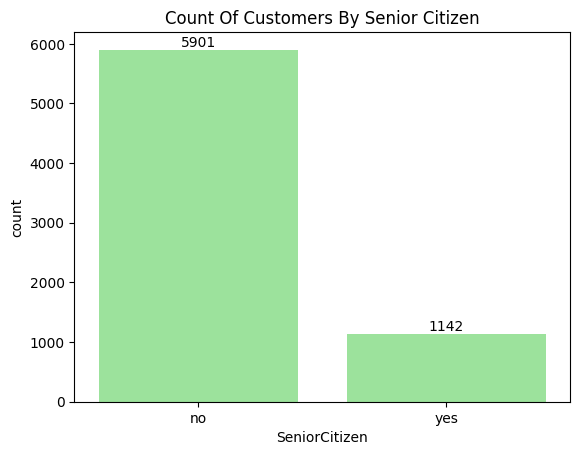

In [52]:
ax =  sns.countplot(x = "SeniorCitizen" , data = df , color ="lightgreen" )
plt.title("Count Of Customers By Senior Citizen")
ax.bar_label(ax.containers[0])
plt.show()



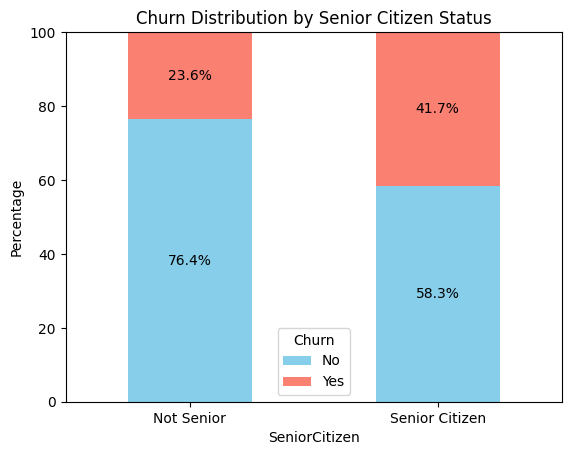

In [53]:
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100

ct_pct.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

for i, (index, row) in enumerate(ct_pct.iterrows()):
    cumulative = 0
    for j, val in enumerate(row):
        plt.text(i, cumulative + val / 2, f'{val:.1f}%', ha='center', va='center', fontsize=10)
        cumulative += val

plt.xticks(ticks=[0,1], labels=['Not Senior', 'Senior Citizen'], rotation=0)
plt.ylabel("Percentage")
plt.title("Churn Distribution by Senior Citizen Status")
plt.legend(title="Churn")
plt.ylim(0, 100)
plt.show()

#Comparative a greater Percentage of people in Senior Citizen Category have Churned 

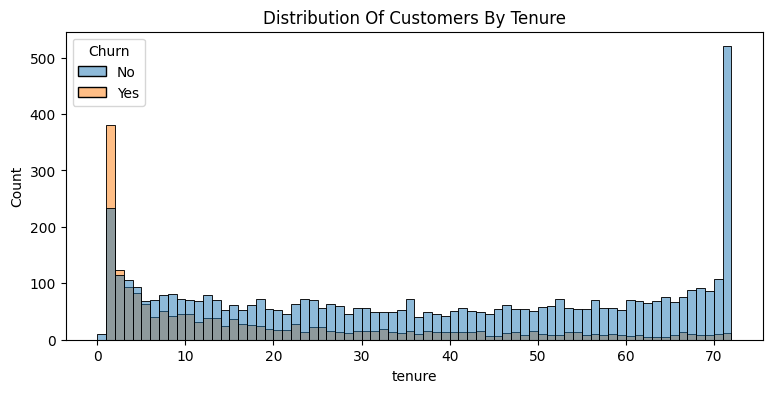

In [63]:
plt.figure(figsize=(9 , 4))
ax = sns.histplot(x = "tenure" , data = df  , bins = 72 , hue = "Churn")
plt.title("Distribution Of Customers By Tenure")
plt.show()

#Most churn occurs in the initial months, especially at the start of tenure.
Customers with longer tenure show significantly higher retention.

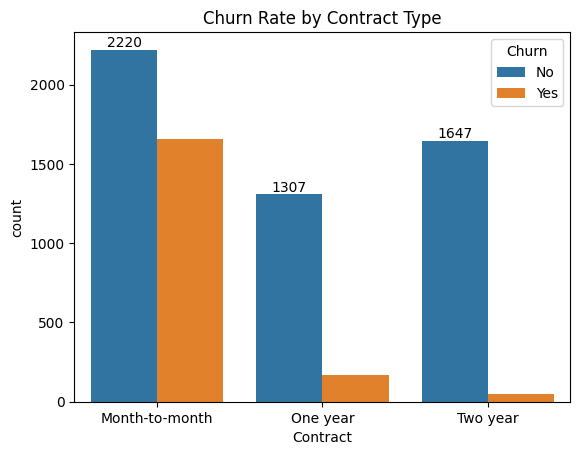

In [68]:
ax =  sns.countplot(x = "Contract"  , data = df , hue = "Churn")
plt.title("Churn Rate by Contract Type")
ax.bar_label(ax.containers[0])
plt.show()

#Customers on month-to-month contracts have the highest churn rate, indicating lower commitment and flexibility to leave.

One-year and two-year contract customers show significantly lower churn, suggesting long-term contracts improve customer retention.



In [69]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

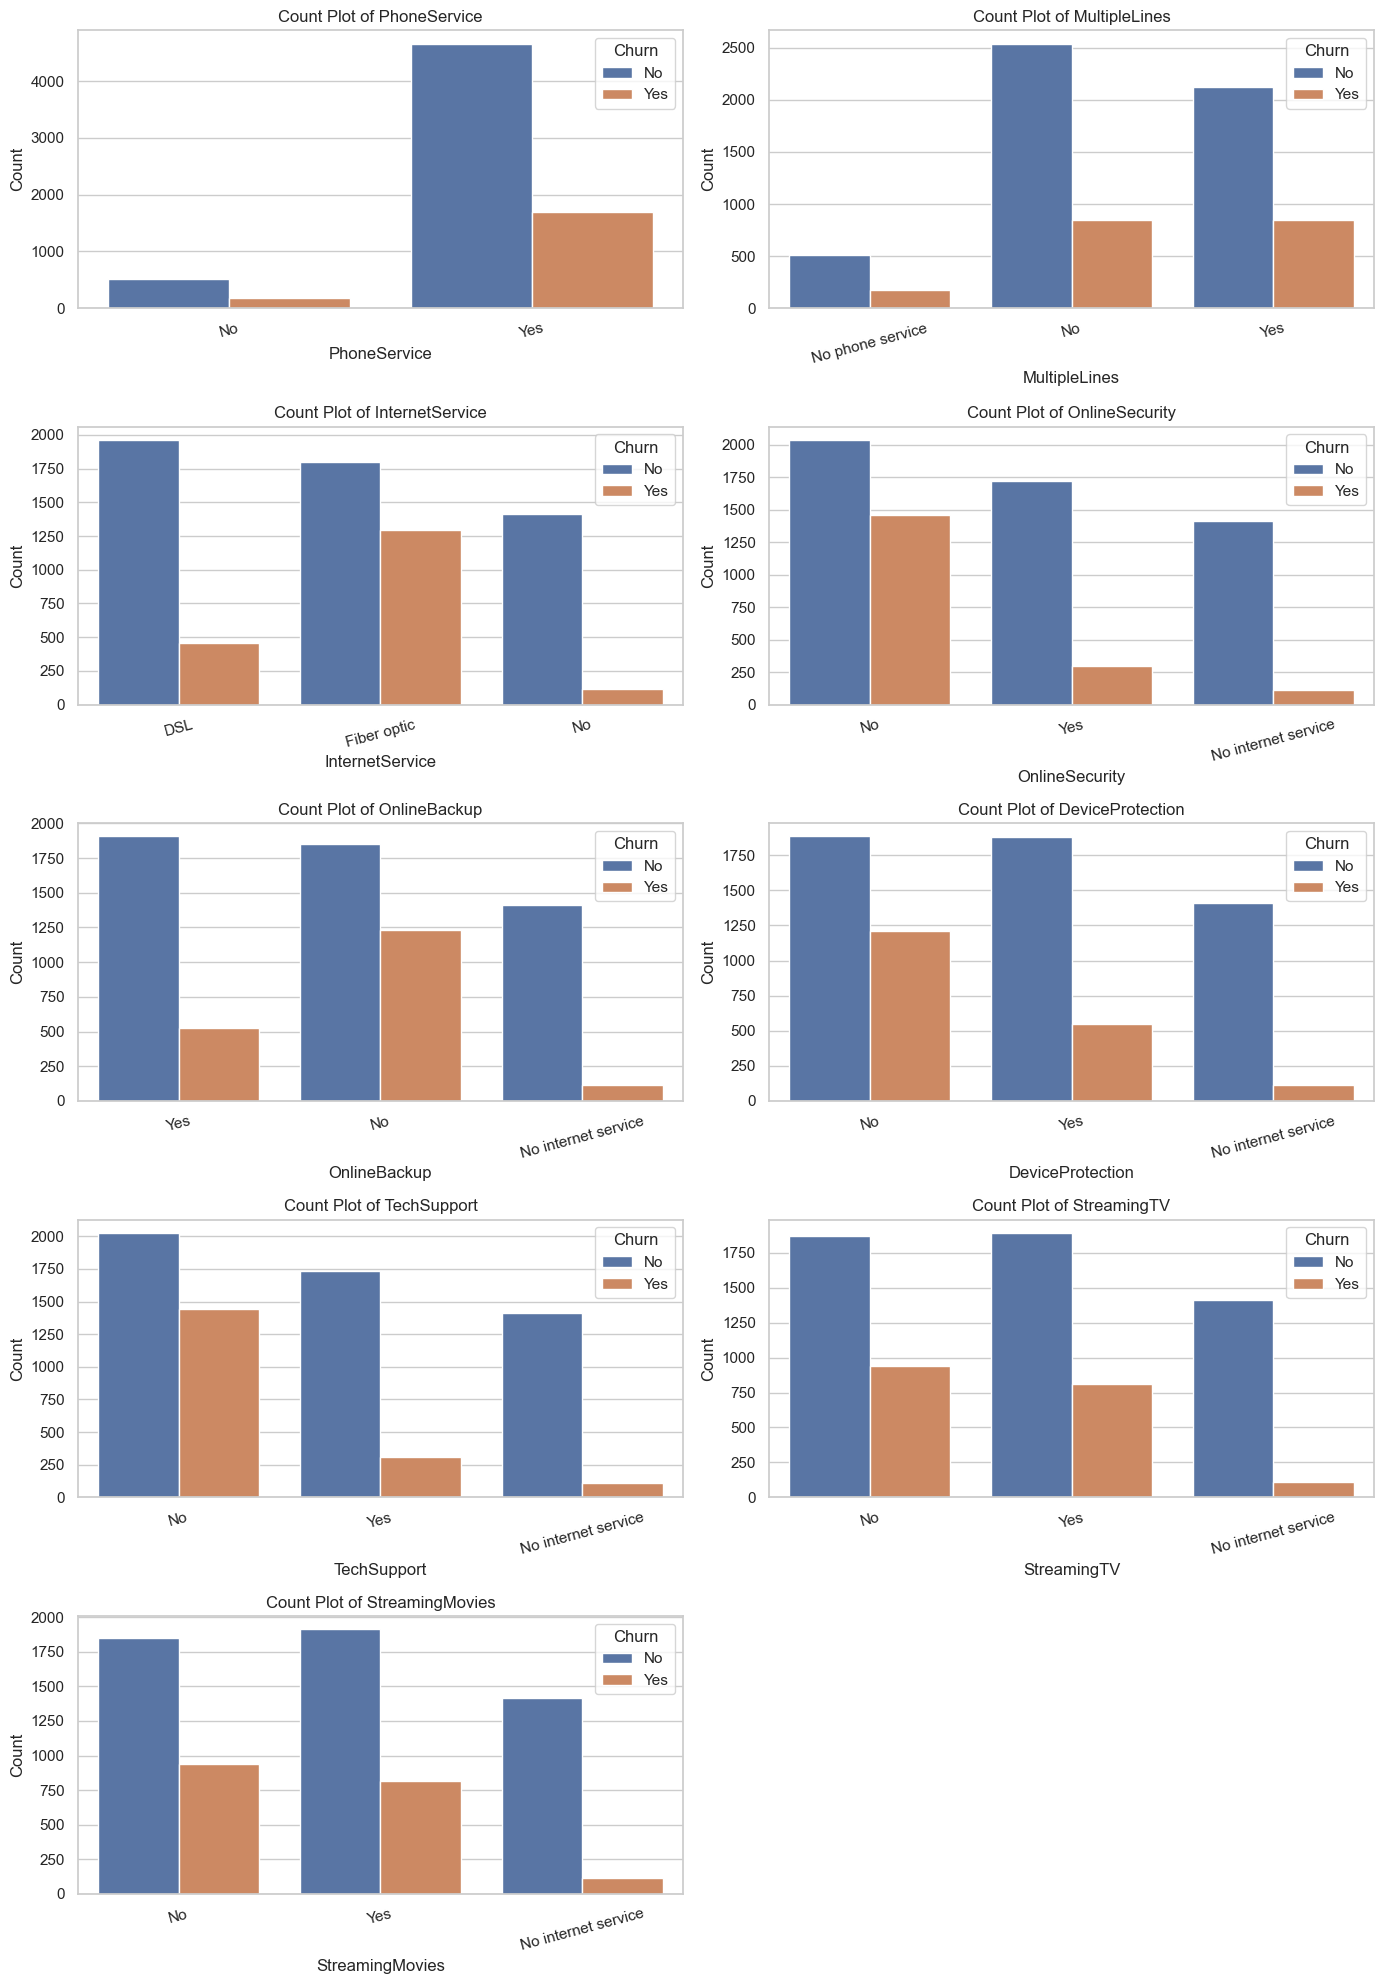

In [73]:


# List of categorical columns
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Settings for plot style
sns.set(style="whitegrid")

# Setup: 2 plots per row
n_cols = 2
n_rows = (len(cols) + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
axes = axes.flatten()

# Generate each plot
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i] , hue = df["Churn"])
    axes[i].set_title(f"Count Plot of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=15)

# Hide unused subplots
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#the distribution of customer churn across various services, including PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies. Customers with "Yes" for services like Fiber optic and OnlineBackup tend to have a lower churn rate. In contrast, customers without services such as OnlineSecurity, TechSupport, or StreamingTV show a higher churn rate. The data suggests that customers with more service subscriptions are less likely to churn.

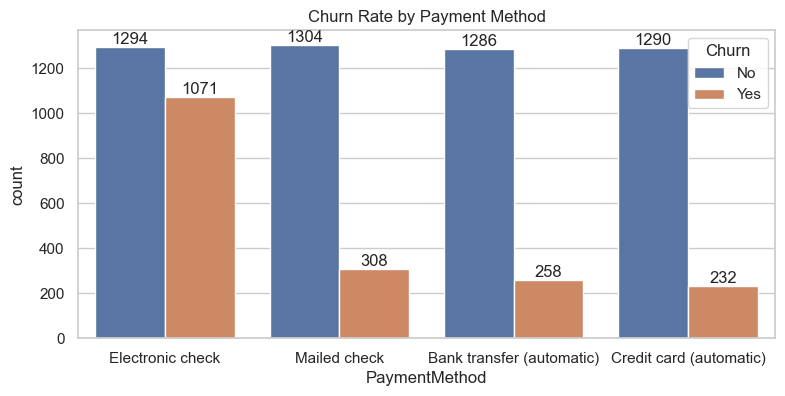

In [77]:
plt.figure(figsize=(9 , 4))
ax = sns.countplot(x = "PaymentMethod" , data = df , hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn Rate by Payment Method")
plt.show()

#Customer is likely to Churn when  he used electronic check as payment method 